[-9.9000000e-01 -9.8000000e-01 -9.7000000e-01 -9.6000000e-01
 -9.5000000e-01 -9.4000000e-01 -9.3000000e-01 -9.2000000e-01
 -9.1000000e-01 -9.0000000e-01 -8.9000000e-01 -8.8000000e-01
 -8.7000000e-01 -8.6000000e-01 -8.5000000e-01 -8.4000000e-01
 -8.3000000e-01 -8.2000000e-01 -8.1000000e-01 -8.0000000e-01
 -7.9000000e-01 -7.8000000e-01 -7.7000000e-01 -7.6000000e-01
 -7.5000000e-01 -7.4000000e-01 -7.3000000e-01 -7.2000000e-01
 -7.1000000e-01 -7.0000000e-01 -6.9000000e-01 -6.8000000e-01
 -6.7000000e-01 -6.6000000e-01 -6.5000000e-01 -6.4000000e-01
 -6.3000000e-01 -6.2000000e-01 -6.1000000e-01 -6.0000000e-01
 -5.9000000e-01 -5.8000000e-01 -5.7000000e-01 -5.6000000e-01
 -5.5000000e-01 -5.4000000e-01 -5.3000000e-01 -5.2000000e-01
 -5.1000000e-01 -5.0000000e-01 -4.9000000e-01 -4.8000000e-01
 -4.7000000e-01 -4.6000000e-01 -4.5000000e-01 -4.4000000e-01
 -4.3000000e-01 -4.2000000e-01 -4.1000000e-01 -4.0000000e-01
 -3.9000000e-01 -3.8000000e-01 -3.7000000e-01 -3.6000000e-01
 -3.5000000e-01 -3.40000

(array([ 3.,  9., 18., 30., 40., 39., 30., 18.,  9.,  3.]),
 array([-1.82138637e+00, -1.45710909e+00, -1.09283182e+00, -7.28554547e-01,
        -3.64277274e-01,  2.19824159e-14,  3.64277274e-01,  7.28554547e-01,
         1.09283182e+00,  1.45710909e+00,  1.82138637e+00]),
 <a list of 10 Patch objects>)

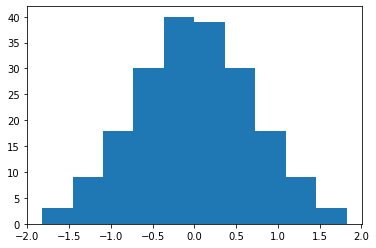

In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
from scipy.special import erfinv
 
# simulating normalized ranks from -0.99 to 0.99
x = np.arange( -0.99, 1, 0.01 )
print(x) # 均匀分布变为正太分布
 
y = erfinv( x )
plt.hist( y )

# RankGauss的具体计算过程

In [7]:
x = np.array([45, 25, 94, 96, 40])
# 第一步：将原始数据排序，只保留排序信息
x = x.argsort().argsort() 
print(x) 
# 第二步：将数据变换到[-1, 1]区间
x = (x / x.max() - 0.5) * 2
print(x)
# 第三步：调整极端值
epsilon = 1e-6
x = np.clip(x, -1 + epsilon, 1 - epsilon) # 
print(x)
# 第四步：erfinv- 使得我们的数据分布转换为了高斯分布
# 上一步调整极端值是为了这里做准备，因为 erfinv(1) 等于正无穷，erfinv(-1)等于负无穷。
from scipy.special import erfinv
x = erfinv(x)
print(x)

[2 0 3 4 1]
[ 0.  -1.   0.5  1.  -0.5]
[ 0.       -0.999999  0.5       0.999999 -0.5     ]
[ 0.         -3.45891074  0.47693628  3.45891074 -0.47693628]


# 对比 RankGauss, 标准化，归一化的效果
让我们对比看看这三种方式对数据的影响。

我们先定义这三种转换方式的函数，并对随机生成的1000个数做转换，看看对数据分布的影响。

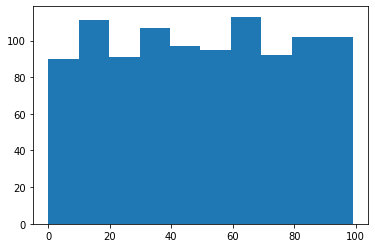

In [14]:
def scale_minmax(x):
    '''归一化'''
    return (x - x.min()) / (x.max() - x.min())

def scale_norm(x):
    '''标准化'''
    return (x - x.mean()) / x.std()

def scale_rankgauss(x, epsilon=1e-6): 
    '''rankgauss'''
    x = x.argsort().argsort() # rank
    x = (x/x.max()-0.5)*2 # scale
    x = np.clip(x, -1+epsilon, 1-epsilon)
    x = erfinv(x)
    return x

x = np.random.randint(0, 100, 1000)
# 原始数据
plt.hist(x)

x_norm = scale_norm(x)
x_minmax = scale_minmax(x)
x_rankgauss = scale_rankgauss(x)

(array([21., 24., 10., 10., 25., 25., 23., 24., 19., 20., 17., 21., 18.,
        14., 21., 24., 24., 18., 19., 22., 23., 27., 20., 15., 12., 20.,
        18., 19., 18., 20., 26., 22., 21., 18., 26., 21., 22., 13., 20.,
        16., 29., 22., 25., 11., 15., 15., 17., 27., 22., 21.]),
 array([-1.7253041 , -1.6564741 , -1.58764409, -1.51881408, -1.44998407,
        -1.38115406, -1.31232406, -1.24349405, -1.17466404, -1.10583403,
        -1.03700402, -0.96817402, -0.89934401, -0.830514  , -0.76168399,
        -0.69285398, -0.62402398, -0.55519397, -0.48636396, -0.41753395,
        -0.34870394, -0.27987394, -0.21104393, -0.14221392, -0.07338391,
        -0.0045539 ,  0.0642761 ,  0.13310611,  0.20193612,  0.27076613,
         0.33959614,  0.40842614,  0.47725615,  0.54608616,  0.61491617,
         0.68374618,  0.75257618,  0.82140619,  0.8902362 ,  0.95906621,
         1.02789622,  1.09672622,  1.16555623,  1.23438624,  1.30321625,
         1.37204626,  1.44087626,  1.50970627,  1.57853628,

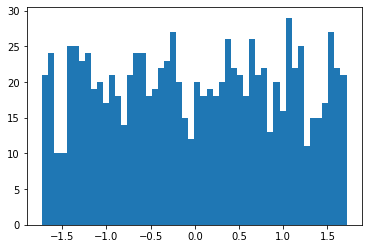

In [15]:
# 经过标准化处理
plt.hist(x_norm, bins=50)

(array([21., 24., 10., 10., 25., 25., 23., 24., 19., 20., 17., 21., 18.,
        14., 21., 24., 24., 18., 19., 22., 23., 27., 20., 15., 12., 20.,
        18., 19., 18., 20., 26., 22., 21., 18., 26., 21., 22., 13., 20.,
        16., 29., 22., 25., 11., 15., 15., 17., 27., 22., 21.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

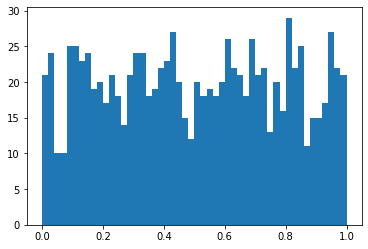

In [17]:
# 经过归一化处理
plt.hist(x_minmax, bins=50)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,  4.,
         6., 10., 14., 19., 27., 35., 43., 53., 62., 69., 75., 77., 77.,
        75., 69., 62., 53., 43., 35., 27., 19., 14., 10.,  6.,  4.,  2.,
         2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-3.45891074e+00, -3.32055431e+00, -3.18219788e+00, -3.04384145e+00,
        -2.90548502e+00, -2.76712859e+00, -2.62877216e+00, -2.49041573e+00,
        -2.35205930e+00, -2.21370287e+00, -2.07534644e+00, -1.93699001e+00,
        -1.79863358e+00, -1.66027715e+00, -1.52192072e+00, -1.38356429e+00,
        -1.24520787e+00, -1.10685144e+00, -9.68495006e-01, -8.30138577e-01,
        -6.91782147e-01, -5.53425718e-01, -4.15069288e-01, -2.76712859e-01,
        -1.38356429e-01, -7.72404363e-12,  1.38356429e-01,  2.76712859e-01,
         4.15069288e-01,  5.53425718e-01,  6.91782147e-01,  8.30138577e-01,
         9.68495006e-01,  1.10685144e+00,  1.24520787e+00,  1.38356429e+00,
         1.52192072e+00,  1.6602

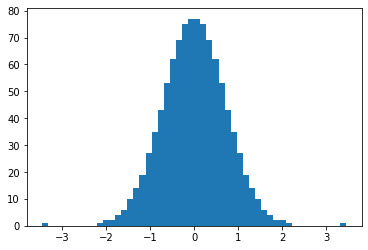

In [18]:
# 进过GaussRank处理
plt.hist(x_rankgauss, bins=50)

因为数据本身是随机生成的，所以数据分布很均匀。

经过标准化和归一化，数据本身的分布并没有发生改变，只是值的大小变化了。

本来数据的范围是在0-100。经过标准化，数据范围是-1.7-1.7。而经过归一化，数据范围是0-1。

经过 RankGauss 的处理后，数据转换为了高斯分布，数据范围是-3.46-3.46。这就是 RankGauss 的不同之处。
它可以将数据转换为高斯分布，但是代价是只保留了数据的排序信息。

# RankGauss 在真实数据集上的效果

让我们对比看看 RankGuass，标准化，归一化在真实数据集上，对模型结果的影响是怎么样的。

我们以 MOA 比赛为例，下表是分别使用这三种方法模型的loss，可以看出使用rankGauss的模型效果最好。

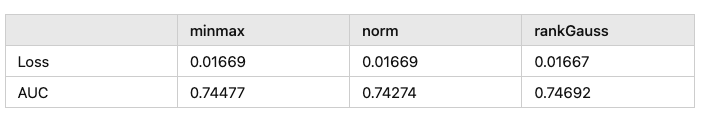

# 总结
总的来说，RankGauss 是一个不错的转换数据的方法。

在使用神经网络模型时，我们可以对比 RankGauss，标准化，归一化的效果。

RankGauss 的优势是将数据转换为了高斯分布，但是代价是只保留了数据的排序信息。

如果有任何问题，欢迎在下方留言。